## Imports

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

## Read the dataset: IMDB Reviews

In [4]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [5]:
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [6]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='C:\\Users\\Administrator.DAI-PC2\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_exam

In [8]:
train_data, test_data = imdb['train'], imdb['test']

In [9]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [10]:
type (train_data), type (test_data)

(tensorflow.python.data.ops.prefetch_op._PrefetchDataset,
 tensorflow.python.data.ops.prefetch_op._PrefetchDataset)

In [11]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [22]:
training_sentences[3]

"b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'"

In [23]:
training_labels[3]

1

In [24]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [25]:
len(training_sentences), len(testing_sentences)

(25000, 25000)

In [28]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
traunc_type = 'post'

In [31]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [32]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [33]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [35]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=traunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [36]:
len(sequences), len(sequences[0])

(25000, 110)

In [37]:
len(padded), len(padded[0])

(25000, 120)

In [38]:
padded.dtype

dtype('int32')

In [39]:
testing_padded.shape

(25000, 120)

## Building Model

In [40]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

In [42]:
model_rnn = Sequential([Embedding(vocab_size, embedding_dim, input_length=max_length),
                        SimpleRNN(32), Dense(10, activation='relu'), Dense(1, activation='sigmoid')])

model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile Model

In [45]:
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
history = model_rnn.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10



782/782 [==============================] - 29s 34ms/step - loss: 0.6922 - accuracy: 0.5197 - val_loss: 0.6672 - val_accuracy: 0.6187
Epoch 2/10
782/782 [==============================] - 26s 34ms/step - loss: 0.5529 - accuracy: 0.7253 - val_loss: 0.4630 - val_accuracy: 0.7994
Epoch 3/10
782/782 [==============================] - 26s 34ms/step - loss: 0.3621 - accuracy: 0.8432 - val_loss: 0.5449 - val_accuracy: 0.7780
Epoch 4/10
782/782 [==============================] - 26s 34ms/step - loss: 0.2124 - accuracy: 0.9186 - val_loss: 0.6036 - val_accuracy: 0.7649
Epoch 5/10
782/782 [==============================] - 26s 34ms/step - loss: 0.1075 - accuracy: 0.9619 - val_loss: 0.7476 - val_accuracy: 0.7638
Epoch 6/10
782/782 [==============================] - 26s 34ms/step - loss: 0.0578 - accuracy: 0.9805 - val_loss: 0.8484 - val_accuracy: 0.7701
Epoch 7/10
782/782 [==============================] - 26s 34ms/step - loss: 0.0453 - accuracy: 0.9841 - val_loss: 0.9770 - val_accuracy: 0.7961
Epo

In [47]:
import matplotlib.pylab as plt

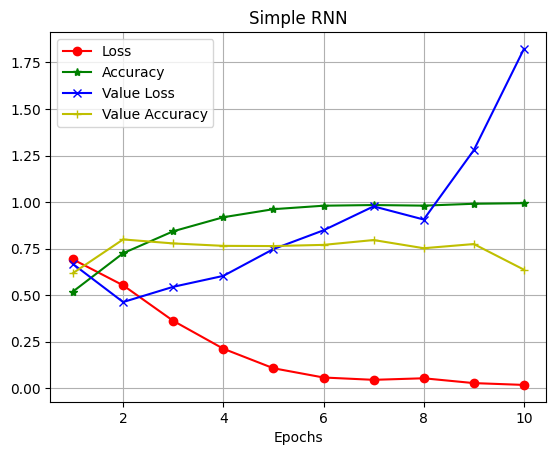

In [52]:
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color='r', label='Loss', marker='o')
plt.plot(range(1,11), history.history['accuracy'], color='g', label='Accuracy', marker='*')
plt.plot(range(1,11), history.history['val_loss'], color='b', label='Value Loss', marker='x')
plt.plot(range(1,11), history.history['val_accuracy'], color='y', label='Value Accuracy', marker='+')
plt.legend(loc = 'upper left');

In [53]:
history.history

{'loss': [0.6921688914299011,
  0.5528594255447388,
  0.36206069588661194,
  0.21241609752178192,
  0.10746924579143524,
  0.057765550911426544,
  0.045272864401340485,
  0.053644996136426926,
  0.027703072875738144,
  0.017933402210474014],
 'accuracy': [0.5196800231933594,
  0.7253199815750122,
  0.8432400226593018,
  0.9186000227928162,
  0.9618800282478333,
  0.9805200099945068,
  0.9841200113296509,
  0.9809200167655945,
  0.9909200072288513,
  0.994159996509552],
 'val_loss': [0.6672208309173584,
  0.46304938197135925,
  0.5449252128601074,
  0.6035860180854797,
  0.7476244568824768,
  0.8483914732933044,
  0.976997435092926,
  0.906278133392334,
  1.278951644897461,
  1.8226667642593384],
 'val_accuracy': [0.6186800003051758,
  0.7993999719619751,
  0.7779600024223328,
  0.7648800015449524,
  0.763759970664978,
  0.7701200246810913,
  0.7961199879646301,
  0.7522000074386597,
  0.7746000289916992,
  0.6370000243186951]}

# Build Model for LSTM

In [54]:
from keras.layers import Bidirectional, GRU, LSTM

In [55]:
model_lstm = Sequential([Embedding(vocab_size, embedding_dim, input_length=max_length),
                        Bidirectional(LSTM(32)), Dense(10, activation='relu'), Dense(1, activation='sigmoid')])

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile LSTM Model

In [56]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train LSTM Model

In [63]:
history_lstm = model_lstm.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 59s 76ms/step - loss: 0.0414 - accuracy: 0.9869 - val_loss: 0.8710 - val_accuracy: 0.8057
Epoch 2/10
782/782 [==============================] - 59s 76ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.8422 - val_accuracy: 0.8164
Epoch 3/10
782/782 [==============================] - 61s 77ms/step - loss: 0.0237 - accuracy: 0.9932 - val_loss: 0.9939 - val_accuracy: 0.8135
Epoch 4/10
782/782 [==============================] - 60s 77ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.8255 - val_accuracy: 0.8008
Epoch 5/10
782/782 [==============================] - 57s 73ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.9740 - val_accuracy: 0.8096
Epoch 6/10
782/782 [==============================] - 58s 74ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 1.0207 - val_accuracy: 0.7878
Epoch 7/10
782/782 [==============================] - 60s 76ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.9776 - val_accuracy:

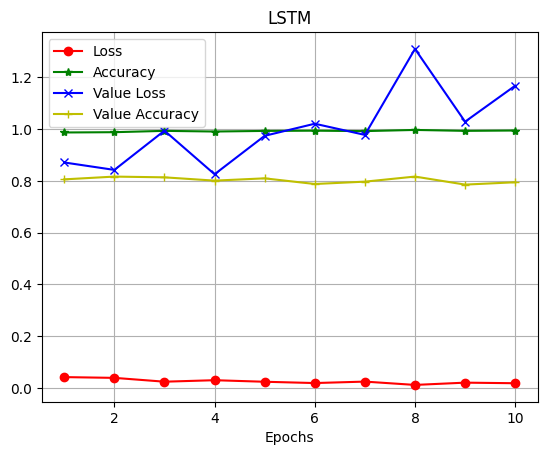

In [64]:
plt.title('LSTM')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label='Loss', marker='o')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='g', label='Accuracy', marker='*')
plt.plot(range(1,11), history_lstm.history['val_loss'], color='b', label='Value Loss', marker='x')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='y', label='Value Accuracy', marker='+')
plt.legend(loc = 'upper left');

## Build model for GRU

In [65]:
model_gru = Sequential([Embedding(vocab_size, embedding_dim, input_length=max_length),
                        Bidirectional(GRU(32)), Dense(10, activation='relu'), Dense(1, activation='sigmoid')])

model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170261 (665.08 KB)
Trainable params: 170261 (665.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile GRU Model

In [66]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train GRU Model

In [67]:
history_gru = model_gru.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 69s 83ms/step - loss: 0.4904 - accuracy: 0.7370 - val_loss: 0.3519 - val_accuracy: 0.8456
Epoch 2/10
782/782 [==============================] - 63s 81ms/step - loss: 0.2840 - accuracy: 0.8846 - val_loss: 0.3512 - val_accuracy: 0.8494
Epoch 3/10
782/782 [==============================] - 65s 83ms/step - loss: 0.2198 - accuracy: 0.9166 - val_loss: 0.3803 - val_accuracy: 0.8383
Epoch 4/10
782/782 [==============================] - 63s 81ms/step - loss: 0.1654 - accuracy: 0.9406 - val_loss: 0.4744 - val_accuracy: 0.8330
Epoch 5/10
782/782 [==============================] - 63s 80ms/step - loss: 0.1238 - accuracy: 0.9564 - val_loss: 0.4759 - val_accuracy: 0.8242
Epoch 6/10
782/782 [==============================] - 64s 81ms/step - loss: 0.0856 - accuracy: 0.9710 - val_loss: 0.6213 - val_accuracy: 0.8168
Epoch 7/10
782/782 [==============================] - 63s 80ms/step - loss: 0.0586 - accuracy: 0.9808 - val_loss: 0.6915 - val_accuracy:

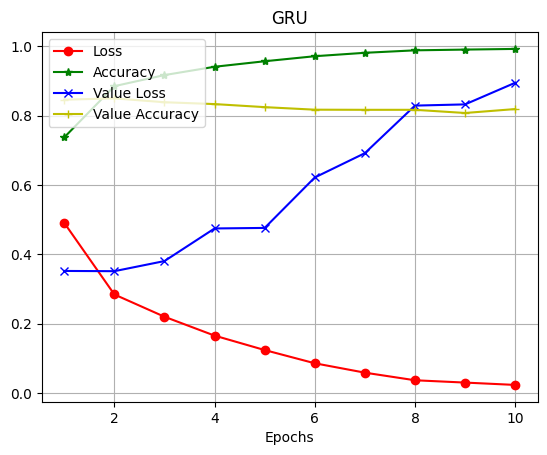

In [68]:
plt.title('GRU')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_gru.history['loss'], color='r', label='Loss', marker='o')
plt.plot(range(1,11), history_gru.history['accuracy'], color='g', label='Accuracy', marker='*')
plt.plot(range(1,11), history_gru.history['val_loss'], color='b', label='Value Loss', marker='x')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color='y', label='Value Accuracy', marker='+')
plt.legend(loc = 'upper left');

## Epochs

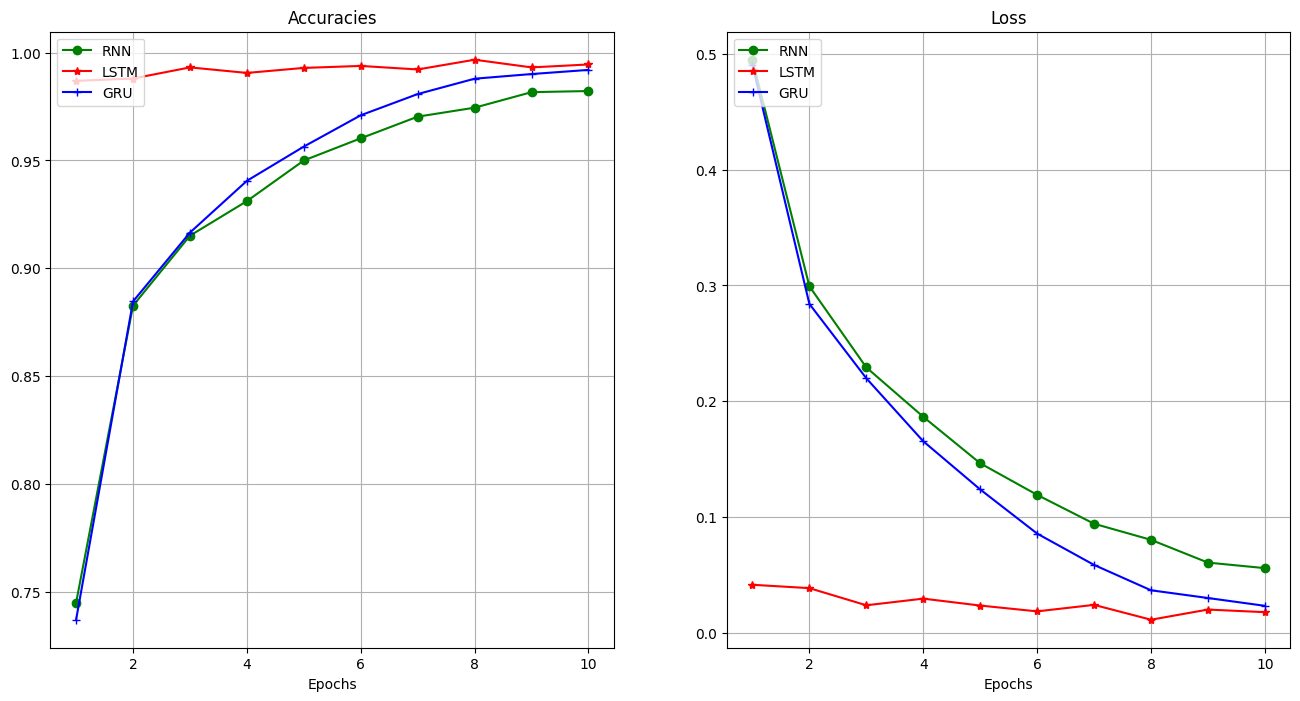

In [71]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['accuracy'], color='g', label='RNN', marker='o')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='r', label='LSTM', marker='*')
plt.plot(range(1,11), history_gru.history['accuracy'], color='b', label='GRU', marker='+')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color='g', label='RNN', marker='o')
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label='LSTM', marker='*')
plt.plot(range(1,11), history_gru.history['loss'], color='b', label='GRU', marker='+')
plt.legend(loc='upper left')

# plt.subplot(2,2,1)
# plt.title('Value Loss')
# plt.xlabel('Epochs')
# plt.grid()
# plt.plot(range(1,11), history.history['val_loss'], color='g', label='RNN', marker='o')
# plt.plot(range(1,11), history_lstm.history['val_loss'], color='r', label='LSTM', marker='*')
# plt.plot(range(1,11), history_gru.history['val_loss'], color='b', label='GRU', marker='+')
# plt.legend(loc='upper left')

# plt.subplot(2,2,2)
# plt.title('Value Accuracy')
# plt.xlabel('Epochs')
# plt.grid()
# plt.plot(range(1,11), history.history['val_accuracy'], color='g', label='RNN', marker='o')
# plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='r', label='LSTM', marker='*')
# plt.plot(range(1,11), history_gru.history['val_accuracy'], color='b', label='GRU', marker='+')
# plt.legend(loc='upper left')

plt.show()

# For New Data

In [70]:
new1 = 'This was worst movie. Please do not watch it. Waste of money and time.'
new2 = 'A must watch movie. I loved watching it. It was just amazing!'

In [72]:
def predict(model, text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_length, truncating=traunc_type)

    result = model.predict(pad, verbose=False)
    percent_pos = result[0,0] 
    if round(percent_pos) == 0:
        return (1-percent_pos), "NEGATIVE"
    return percent_pos, "POSITIVE"

In [74]:
predict(model_rnn, new1), predict(model_rnn, new2)

((0.9999992341612938, 'NEGATIVE'), (0.9989678938873112, 'NEGATIVE'))

In [75]:
predict(model_lstm, new1), predict(model_lstm, new2)

((0.999999605399978, 'NEGATIVE'), (0.99961126, 'POSITIVE'))

In [76]:
predict(model_gru, new1), predict(model_gru, new2)

((0.9999845173515496, 'NEGATIVE'), (0.99934864, 'POSITIVE'))

In [85]:
sent1 = 'Mar jaa kutte'

In [86]:
predict(model_rnn, sent1), predict(model_lstm, sent1), predict(model_gru, sent1)

((0.9706398453563452, 'NEGATIVE'),
 (0.99834824, 'POSITIVE'),
 (0.9185809, 'POSITIVE'))